In [23]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

In [38]:
df1=pd.read_excel("Data set -Churn modelling.xlsx")

In [39]:
df1

,Variables,Unnamed: 1
0,Churn,"1 if customer cancelled service, 0 if not"
1,AccountWeeks,number of weeks customer has had active account
2,ContractRenewal,"1 if customer recently renewed contract, 0 if not"
3,DataPlan,"1 if customer has data plan, 0 if not"
4,DataUsage,gigabytes of monthly data usage
5,CustServCalls,number of calls into customer service
6,DayMins,average daytime minutes per month
7,DayCalls,average number of daytime calls
8,MonthlyCharge,average monthly bill
9,OverageFee,largest overage fee in last 12 months


In [40]:
data=pd.read_csv("HR_Employee_Attrition_Data.csv")

In [41]:
data.head()


,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,3,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,4,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,5,...,4,80,1,6,3,3,2,2,2,2


In [43]:
raw=data

In [42]:
data.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [18]:
for i in data.columns:
    print(i)
    print(data[i].unique())
    print(len(data[i].unique()))
    

Age
[41 49 37 33 27 32 59 30 38 36 35 29 31 34 28 22 53 24 21 42 44 46 39 43
 50 26 48 55 45 56 23 51 40 54 58 20 25 19 57 52 47 18 60]
43
Attrition
['Yes' 'No']
2
BusinessTravel
['Travel_Rarely' 'Travel_Frequently' 'Non-Travel']
3
DailyRate
[1102  279 1373 1392  591 1005 1324 1358  216 1299  809  153  670 1346
  103 1389  334 1123 1219  371  673 1218  419  391  699 1282 1125  691
  477  705  924 1459  125  895  813 1273  869  890  852 1141  464 1240
 1357  994  721 1360 1065  408 1211 1229  626 1434 1488 1097 1443  515
  853 1142  655 1115  427  653  989 1435 1223  836 1195 1339  664  318
 1225 1328 1082  548  132  746  776  193  397  945 1214  111  573 1153
 1400  541  432  288  669  530  632 1334  638 1093 1217 1353  120  682
  489  807  827  871  665 1040 1420  240 1280  534 1456  658  142 1127
 1031 1189 1354 1467  922  394 1312  750  441  684  249  841  147  528
  594  470  957  542  802 1355 1150 1329  959 1033 1316  364  438  689
  201 1427  857  933 1181 1395  662 1436  194  9

In [19]:
data.dtypes

Age                          int64
Attrition                   object
BusinessTravel              object
DailyRate                    int64
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EmployeeCount                int64
EmployeeNumber               int64
EnvironmentSatisfaction      int64
Gender                      object
HourlyRate                   int64
JobInvolvement               int64
JobLevel                     int64
JobRole                     object
JobSatisfaction              int64
MaritalStatus               object
MonthlyIncome                int64
MonthlyRate                  int64
NumCompaniesWorked           int64
Over18                      object
OverTime                    object
PercentSalaryHike            int64
PerformanceRating            int64
RelationshipSatisfaction     int64
StandardHours                int64
StockOptionLevel             int64
TotalWorkingYears   

In [90]:
for feature in data.columns: # Loop through all columns in the dataframe
    if data[feature].dtype == 'object': # Only apply for columns with categorical strings
        data[feature] = pd.Categorical(data[feature]).codes 

In [91]:
data.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,2,1102,2,1,2,1,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,0,1,279,1,8,1,1,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,1,2,1373,1,2,2,4,1,3,...,2,80,0,7,3,3,0,0,0,0
3,33,0,1,1392,1,3,4,1,1,4,...,3,80,0,8,3,3,8,7,3,0
4,27,0,2,591,1,2,1,3,1,5,...,4,80,1,6,3,3,2,2,2,2


In [92]:
for i in data.columns:
    data[i].astype(float)

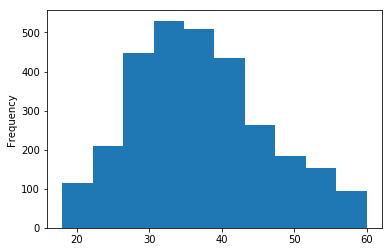

In [93]:
data.Age.plot(kind="hist")    #normal distribution

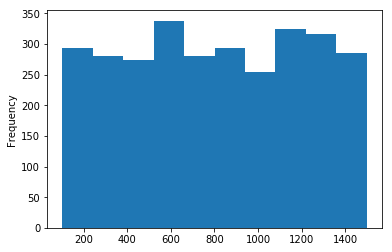

In [94]:
data.DailyRate.plot(kind="hist")      #uniform distributed  

In [95]:
def bar_chart(feature):
    yes = data[data['Attrition']==1][feature].value_counts()
    no = data[data['Attrition']==0][feature].value_counts()
    df = pd.DataFrame([yes,no])
    df.index = ['yes','no']
    df.plot(kind='bar',stacked=True, figsize=(10,5))

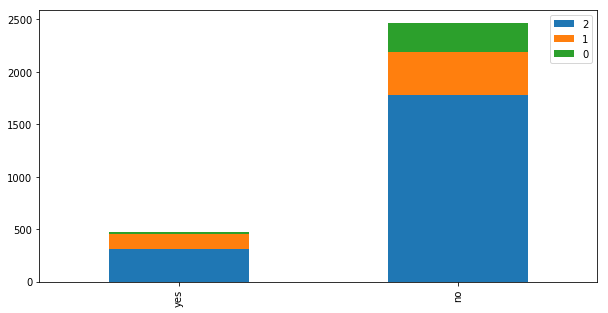

In [96]:
bar_chart('BusinessTravel')

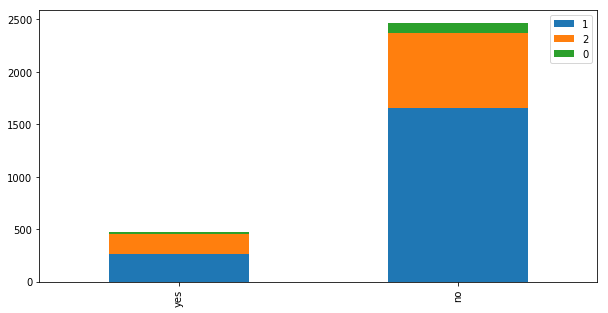

In [97]:
bar_chart('Department')

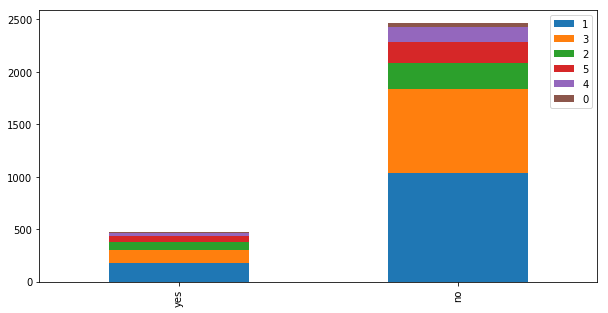

In [98]:
bar_chart('EducationField')

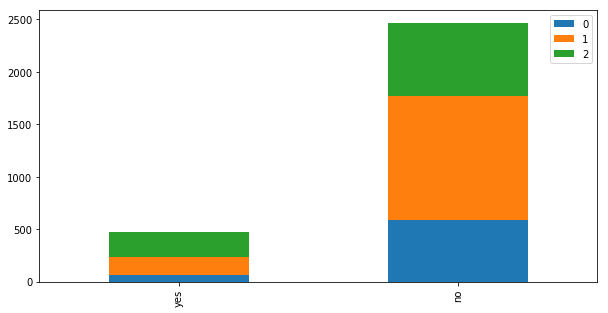

In [99]:
bar_chart('MaritalStatus')

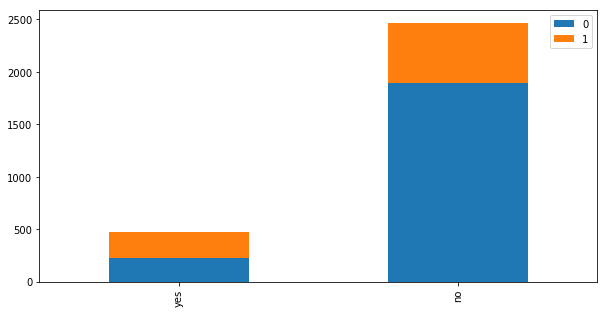

In [100]:
bar_chart('OverTime')

In [105]:
#!pip3 install pandas-profiling
import pandas_profiling 

In [106]:
pandas_profiling.ProfileReport(data)

Number of variables,35
Number of observations,2940
Total Missing (%),0.0%
Total size in memory,623.1 KiB
Average record size in memory,217.0 B
Numeric,27
Categorical,0
Boolean,4
Date,0
Text (Unique),0
Rejected,4


In [107]:
data.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,2,1102,2,1,2,1,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,0,1,279,1,8,1,1,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,1,2,1373,1,2,2,4,1,3,...,2,80,0,7,3,3,0,0,0,0
3,33,0,1,1392,1,3,4,1,1,4,...,3,80,0,8,3,3,8,7,3,0
4,27,0,2,591,1,2,1,3,1,5,...,4,80,1,6,3,3,2,2,2,2


In [108]:
# step wise selection
X=data.drop(labels='Attrition',axis=1)
y=data['Attrition']

In [109]:
import statsmodels.api as sm
from patsy import dmatrices
def stepwise_selection(X,y, 
                       initial_list=[], 
                       threshold_in=0.01, 
                       threshold_out = 0.05, 
                       verbose=True):
    """ Perform a forward-backward feature selection 
    based on p-value from statsmodels.api.OLS
    Arguments:
        X - pandas.DataFrame with candidate features
        y - list-like with the target
        initial_list - list of features to start with (column names of X)
        threshold_in - include a feature if its p-value < threshold_in
        threshold_out - exclude a feature if its p-value > threshold_out
        verbose - whether to print the sequence of inclusions and exclusions
    Returns: list of selected features 
    Always set threshold_in < threshold_out to avoid infinite looping.
    See https://en.wikipedia.org/wiki/Stepwise_regression for the details
    """
    included = list(initial_list)
    while True:
        changed=False
        
        # forward step
        excluded = list(set(X.columns)-set(included))
        new_pval = pd.Series(index=excluded)
        for new_column in excluded:
            model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[included+[new_column]]))).fit()
            new_pval[new_column] = model.pvalues[new_column]
        best_pval = new_pval.min()
        if best_pval < threshold_in:
            best_feature = new_pval.argmin()
            included.append(best_feature)
            changed=True
            if verbose:
                print('Add  {:30} with p-value {:.6}'.format(best_feature, best_pval))
                
        # backward step
        model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[included]))).fit()
        # use all coefs except intercept
        pvalues = model.pvalues.iloc[1:]
        worst_pval = pvalues.max() # null if pvalues is empty
        if worst_pval > threshold_out:
            changed=True
            worst_feature = pvalues.argmax()
            included.remove(worst_feature)
            if verbose:
                print('Drop {:30} with p-value {:.6}'.format(worst_feature, worst_pval))
        if not changed:
            break
    return included

result = stepwise_selection(X, y)

print('resulting features:')
print(result)

C:\Users\sreekar chidurala\Anaconda3\envs\sreekar\lib\site-packages\statsmodels\base\model.py:1100: RuntimeWarning: invalid value encountered in true_divide
  return self.params / self.bse
C:\Users\sreekar chidurala\Anaconda3\envs\sreekar\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
C:\Users\sreekar chidurala\Anaconda3\envs\sreekar\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
C:\Users\sreekar chidurala\Anaconda3\envs\sreekar\lib\site-packages\scipy\stats\_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)
C:\Users\sreekar chidurala\Anaconda3\envs\sreekar\lib\site-packages\ipykernel_launcher.py:33: FutureWarning: 'argmin' is deprecated, use 'idxmin' instead. The behavior of 'argmin'
will be corrected to return the pos

Add  EmployeeCount                  with p-value 2.29478e-114
Add  StandardHours                  with p-value 2.29478e-114
Add  OverTime                       with p-value 8.1199e-42
Add  TotalWorkingYears              with p-value 9.19805e-23
Add  MaritalStatus                  with p-value 1.7768e-18
Add  JobInvolvement                 with p-value 6.89158e-13
Add  EnvironmentSatisfaction        with p-value 1.04724e-12
Add  JobSatisfaction                with p-value 1.43135e-12
Add  NumCompaniesWorked             with p-value 3.20595e-08
Add  DistanceFromHome               with p-value 6.47573e-06
Add  Age                            with p-value 6.90098e-05
Add  YearsInCurrentRole             with p-value 0.000329982
Add  YearsSinceLastPromotion        with p-value 2.06782e-07
Add  RelationshipSatisfaction       with p-value 0.000208965
Add  WorkLifeBalance                with p-value 0.00153115
Add  Department                     with p-value 0.00215171
Add  JobLevel             

C:\Users\sreekar chidurala\Anaconda3\envs\sreekar\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: 'argmax' is deprecated, use 'idxmax' instead. The behavior of 'argmax'
will be corrected to return the positional maximum in the future.
Use 'series.values.argmax' to get the position of the maximum now.


Add  YearsWithCurrManager           with p-value 0.00331226
Add  StockOptionLevel               with p-value 0.00532162
resulting features:
['EmployeeCount', 'StandardHours', 'OverTime', 'MaritalStatus', 'JobInvolvement', 'EnvironmentSatisfaction', 'JobSatisfaction', 'NumCompaniesWorked', 'DistanceFromHome', 'Age', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'RelationshipSatisfaction', 'WorkLifeBalance', 'Department', 'JobLevel', 'Gender', 'YearsWithCurrManager', 'StockOptionLevel']


In [ ]:
# P value less then 0.05 are selected

In [112]:
s_data=data[["EmployeeCount","StandardHours","OverTime","TotalWorkingYears","MaritalStatus" ,"JobInvolvement","EnvironmentSatisfaction","JobSatisfaction","NumCompaniesWorked","DistanceFromHome","Age","YearsInCurrentRole","YearsSinceLastPromotion","RelationshipSatisfaction","WorkLifeBalance","Department","JobLevel","TotalWorkingYears","Gender"]]

In [113]:
s_data.shape

(2940, 19)

In [114]:
s_data.head()

,EmployeeCount,StandardHours,OverTime,TotalWorkingYears,MaritalStatus,JobInvolvement,EnvironmentSatisfaction,JobSatisfaction,NumCompaniesWorked,DistanceFromHome,Age,YearsInCurrentRole,YearsSinceLastPromotion,RelationshipSatisfaction,WorkLifeBalance,Department,JobLevel,TotalWorkingYears,Gender
0,1,80,1,8,2,3,2,4,8,1,41,4,0,1,1,2,2,8,0
1,1,80,0,10,1,2,3,2,1,8,49,7,1,4,3,1,2,10,1
2,1,80,1,7,2,2,4,3,6,2,37,0,0,2,3,1,1,7,1
3,1,80,1,8,1,3,4,3,1,3,33,7,3,3,3,1,1,8,0
4,1,80,0,6,1,3,1,2,9,2,27,2,2,4,3,1,1,6,1


In [ ]:
#adding target label

In [117]:
s_data["Attrition"]=y

C:\Users\sreekar chidurala\Anaconda3\envs\sreekar\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [118]:
#Spliting 70:30 ratio

In [121]:
features=s_data.drop(labels="Attrition",axis=1)
label=s_data["Attrition"]

In [122]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(features, label, test_size=0.3, random_state=0)

## random forest

In [123]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, make_scorer
SEED = 1
model_full_rf = RandomForestClassifier(n_estimators=200, class_weight='balanced', random_state=SEED, n_jobs=-1)
model_full_rf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight='balanced',
            criterion='gini', max_depth=None, max_features='auto',
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=200, n_jobs=-1, oob_score=False, random_state=1,
            verbose=0, warm_start=False)

In [124]:
model_full_rf.score(X_test,y_test)

0.963718820861678

## Neural network

In [125]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout

Using TensorFlow backend.


In [132]:
classifier = Sequential()

In [137]:
classifier.add(Dense(units = 128, kernel_initializer = 'uniform', activation = 'relu', input_dim = features.shape[1]))

In [138]:
classifier.add(Dense(units = 128, kernel_initializer = 'uniform', activation = 'relu'))

In [139]:
classifier.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))

In [140]:
classifier.compile(optimizer = 'adam', loss = 'mean_squared_error', metrics = ['accuracy'])

In [141]:
classifier.fit(X_train, y_train, batch_size = 10, epochs = 100)


Epoch 1/100
2058/2058 [==============================] - 1s 607us/step - loss: 0.1322 - acc: 0.8401
Epoch 2/100
2058/2058 [==============================] - 0s 117us/step - loss: 0.1237 - acc: 0.8406
Epoch 3/100
2058/2058 [==============================] - ETA: 0s - loss: 0.1174 - acc: 0.849 - 0s 117us/step - loss: 0.1164 - acc: 0.8508
Epoch 4/100
2058/2058 [==============================] - 0s 117us/step - loss: 0.1132 - acc: 0.8518
Epoch 5/100
2058/2058 [==============================] - 0s 123us/step - loss: 0.1040 - acc: 0.8678
Epoch 6/100
2058/2058 [==============================] - 0s 113us/step - loss: 0.1069 - acc: 0.8586
Epoch 7/100
2058/2058 [==============================] - 0s 175us/step - loss: 0.1031 - acc: 0.8678
Epoch 8/100
2058/2058 [==============================] - 0s 146us/step - loss: 0.1029 - acc: 0.8639
Epoch 9/100
2058/2058 [==============================] - 0s 147us/step - loss: 0.1001 - acc: 0.8727
Epoch 10/100
2058/2058 [==============================] - 0s 1

2058/2058 [==============================] - 0s 139us/step - loss: 0.0743 - acc: 0.9096
Epoch 81/100
2058/2058 [==============================] - 0s 137us/step - loss: 0.0704 - acc: 0.9169
Epoch 82/100
2058/2058 [==============================] - 0s 137us/step - loss: 0.0719 - acc: 0.9135
Epoch 83/100
2058/2058 [==============================] - 0s 133us/step - loss: 0.0707 - acc: 0.9159 0s - loss: 0.0691 - acc: 0.
Epoch 84/100
2058/2058 [==============================] - 0s 122us/step - loss: 0.0687 - acc: 0.9193
Epoch 85/100
2058/2058 [==============================] - 0s 126us/step - loss: 0.0675 - acc: 0.9223
Epoch 86/100
2058/2058 [==============================] - 0s 119us/step - loss: 0.0737 - acc: 0.9111
Epoch 87/100
2058/2058 [==============================] - 0s 180us/step - loss: 0.0697 - acc: 0.9203
Epoch 88/100
2058/2058 [==============================] - 0s 192us/step - loss: 0.0686 - acc: 0.9164
Epoch 89/100
2058/2058 [==============================] - 0s 143us/step - lo

In [143]:
pred=classifier.predict(X_test)

In [147]:
pred = (pred > 0.5)

In [154]:
predicted=pred.astype(int)

In [155]:
type(predicted)

numpy.ndarray

In [161]:
b = np.reshape(predicted, (1,np.product(predicted.shape)))


In [171]:
c=pd.DataFrame(d)

In [174]:
from sklearn.metrics import classification_report
print(classification_report(y_test,c[0]))

              precision    recall  f1-score   support

           0       0.92      0.97      0.95       737
           1       0.79      0.59      0.68       145

   micro avg       0.91      0.91      0.91       882
   macro avg       0.86      0.78      0.81       882
weighted avg       0.90      0.91      0.90       882

